In [1]:
import numpy as np
import mesh_to_sdf
import trimesh
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import tensorflow as tf
import mcubes

In [8]:
mesh = trimesh.load_mesh("monkj.obj")
points, dists = mesh_to_sdf.sample_sdf_near_surface(mesh, number_of_points=250000)
points, dists = points/2., dists/2.
print(points.min(), points.max(), points.shape)
print(dists.min(), dists.max(), dists.shape)

-0.49929067 0.49456847 (250000, 3)
-0.20578398 0.34342945 (250000,)


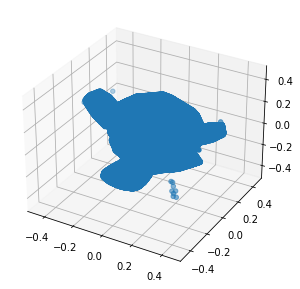

In [9]:
fig =plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim3d(-0.5, 0.5)
ax.set_ylim3d(-0.5, 0.5)
ax.set_zlim3d(-0.5, 0.5)
result = points[dists<0]
ax.scatter(result[:, 0], result[:, 1], result[:, 2]*-1)

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(None,3)))
for i in range(64):
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1))

adam = tf.keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer=adam, loss='MSE', metrics=['MSE'])

In [11]:
model.fit(points, dists, batch_size=2048, epochs=2500)

Epoch 1/2500
123/123 [==============================] - 3s 7ms/step - loss: 0.0011 - MSE: 0.0011
Epoch 2/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0011 - MSE: 0.0011
Epoch 3/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0011 - MSE: 0.0011
Epoch 4/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0011 - MSE: 0.0011
Epoch 5/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0010 - MSE: 0.0010
Epoch 6/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0010 - MSE: 0.0010
Epoch 7/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0010 - MSE: 0.0010
Epoch 8/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0010 - MSE: 0.0010
Epoch 9/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0010 - MSE: 0.0010
Epoch 10/2500
123/123 [==============================] - 1s 7ms/step - loss: 0.0010 - MSE: 0.0010
Epoch 11/2500
123/123 [======

KeyboardInterrupt: 

In [7]:
RESOLUTION = 256
points_pred = np.array(np.mgrid[-0.5:0.5:RESOLUTION*1j,
                           -0.5:0.5:RESOLUTION*1j,
                           -0.5:0.5:RESOLUTION*1j]).T.reshape(-1,3)
print(points_pred.shape)

(16777216, 3)


In [8]:
dists_pred = model.predict(points_pred, batch_size=2048)
dists_pred.shape
print(dists_pred.min(), dists_pred.max(), dists_pred.shape)

-0.1820953 0.53440464 (16777216, 1)


In [9]:
inside = dists_pred < 0
inside.shape
print(np.unique(inside, return_counts=True))

(array([False,  True]), array([15397626,  1379590], dtype=int64))


(16777216, 3) (1379590, 3)


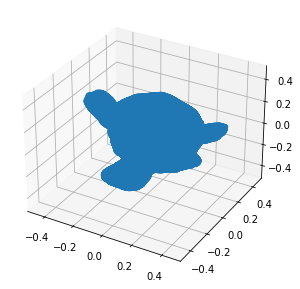

In [10]:
fig =plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim3d(-0.5, 0.5)
ax.set_ylim3d(-0.5, 0.5)
ax.set_zlim3d(-0.5, 0.5)
result = points_pred[inside.reshape(-1)]
print(points_pred.shape, result.shape)
ax.scatter(result[:, 0], result[:, 1], result[:, 2]*-1)

In [11]:
inside = dists_pred < 0
voxels = inside.reshape((RESOLUTION,RESOLUTION,RESOLUTION)).T
verts, tris = mcubes.marching_cubes(voxels, 0.5)
mcubes.export_obj(verts, tris, f'monkj_mcubes.obj')

# smooth_voxels = mcubes.smooth(voxels)
# verts, tris = mcubes.marching_cubes(smooth_voxels, 0)
# mcubes.export_obj(verts, tris, f'suzanne_mcubes_smooth.obj')


In [7]:
model.weights[0]

<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
array([[ 0.13173753,  0.17213245, -0.01109164,  0.01701404,  0.279409  ,
        -0.25110823,  0.24114358, -0.12566584,  0.28264078,  0.2693045 ,
         0.13747726,  0.1974786 , -0.2765364 ,  0.04126579, -0.03558448,
        -0.18263245,  0.28401583,  0.11572231, -0.0968724 , -0.00722123,
         0.29353255,  0.27422944, -0.07007398,  0.07898729, -0.28951448,
        -0.08255998,  0.02503365,  0.19606826, -0.22301014, -0.21224925,
        -0.00507025, -0.09408057,  0.02958971, -0.20667551,  0.24420008,
         0.14310351, -0.05750248,  0.01412833,  0.11837327,  0.17933251,
         0.28254697, -0.28984904,  0.05739543,  0.2826874 ,  0.21099094,
        -0.01628161,  0.0105535 , -0.16390221, -0.0300715 ,  0.29405695,
         0.26024428,  0.01492229, -0.14637628,  0.2429211 ,  0.04437204,
        -0.05219605, -0.270033  , -0.2795076 ,  0.14004168,  0.04708319,
         0.12957457, -0.18878973, -0.00177331, -0.02314945